In [1]:
import csv
from matplotlib import pyplot as plt

In [2]:
def plot_pool_size_v_test_acc(data, third_var_key="m", third_var_type=int):

    pool_sizes = sorted(list(set([int(x["pool_size"]) for x in data])))
    third_vars = sorted(list(set([third_var_type(x[third_var_key]) for x in data])))
    # PLot x ax pool size, y ax acc, different line for each 
    plt.rcParams["figure.figsize"] = (10,5)

    for third_var in third_vars:
        third_var_const_data = [x for x in data if x[third_var_key] == str(third_var)]

        test_accs = []
        
        for pool_size in pool_sizes:

            data_point = [x for x in third_var_const_data if x["pool_size"] == str(pool_size)][0]
            test_accs.append(float(data_point["test_acc"]))

        plt.plot([int(x) for x in pool_sizes], test_accs, label=third_var, marker = "o")

    plt.xscale("log")
    plt.legend(title=third_var_key)
    plt.xlabel("Pool Size")
    plt.ylabel("Test Acc")
    plt.show()

# CIFAR 10 Varying p

In [3]:
p_data = []
with open('./csv_files/cifar_10_varying_p.csv') as csvfile:
    csvreader = csv.DictReader(csvfile)
    for row in csvreader:
        p_data.append(row)

p_08_data = [x for x in p_data if x["input_p"] == "0.8"]
p_02_data = [x for x in p_data if x["input_p"] == "0.2"]

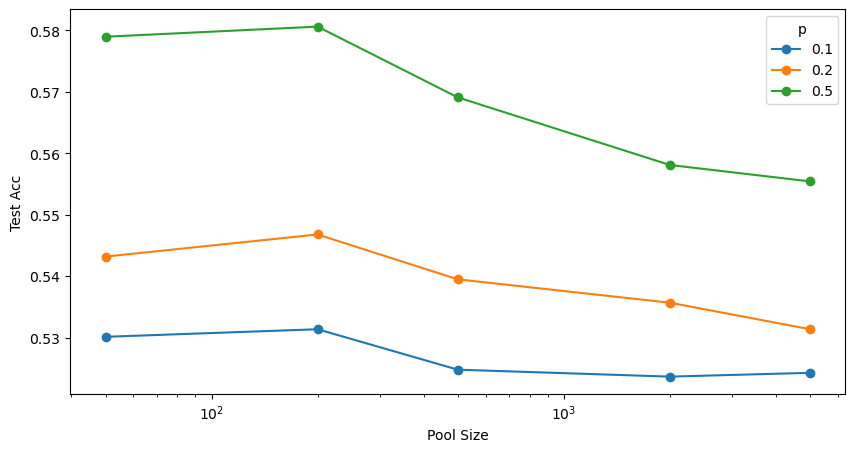

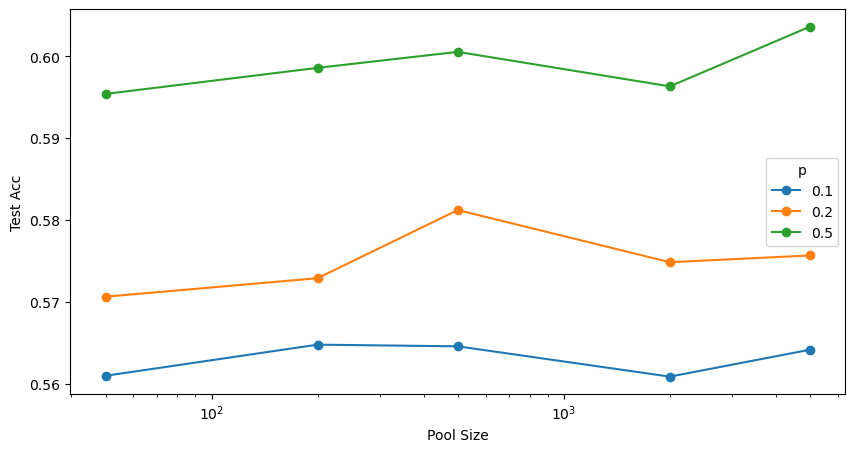

In [4]:
plot_pool_size_v_test_acc(p_08_data, third_var_key="p", third_var_type=float)
plot_pool_size_v_test_acc(p_02_data, third_var_key="p", third_var_type=float)